## Demo and Presentation Final Project CS207
### Automatic Differentiation: 
  - A user-friendly, flexible interface for derivatives
  - Course CS 207: Systems Development for Computational Science
  - Instructor Prof. David Sondak

### Contributors:
 - FELDHAUS Isabelle 
 - JIANG Shenghao 
 - STRUYVEN Robbert
 - WANG William

### Repositories:
 - [```Github Repository```](https://github.com/cs207-f18-WIRS/cs207-FinalProject/)
 - [```PyPi Python Package Index distribution: 'AD-cs207'```](https://pypi.org/project/AD-cs207/) 
 
### Date: 12 December 2018

 - [Explanation on how to make this into a slideshow (click here)](#slides)

---

## Motivation

  - Derivatives  are ubiquitous in each and every field. 

  - **[Automatic Differentiation: The most criminally underused tool in the potential machine learning toolbox?](https://justindomke.wordpress.com/2009/02/17/automatic-differentiation-the-most-criminally-underused-tool-in-the-potential-machine-learning-toolbox/)**


## Use Cases

 - Methods
  - Real-parameter optimization extrema
  - Measuring the sensitivity of simulation to unknown parameters
  - Physical modeling, parameter tuning
  - Probabilistic inference
  - Machine learning: optimizing the estimator given a certain loss function.
  
 - **Personal research topics:**
  - Understanding supply chain of vaccines and essential medicines delivery in Ethiopia
  - Optimizing insurance benefits for diabetes control in China
  - Tapping the power of machine learning and echocardiography to improve cardiovascular risk prediction
  
  
---

## AD Package Features
  
 1. Forward mode automatic differentiation
 2. Reverse mode automatic differentiation
 3. Symbolic differentiation 
  - Flexible function input using string parser
  - Returns both numeric value and formula
  - Computation of higher order derivatives
  - ```Sympy``` Package

## Installation via pip install of the [PyPi Package "AD-cs207"](https://pypi.org/project/AD-cs207/) 


In [1]:
!pip uninstall AD-cs207 --yes

Uninstalling AD-cs207-1.0.0:
  Successfully uninstalled AD-cs207-1.0.0


In [2]:
!pip install AD-cs207==1.0.0

---

## 1. Forward Mode Differentiation Implementation

In [3]:
import math

In [4]:
from AD.for_ad import FD
x    = FD("x", 25 , 1)
y    = FD("y", 7  , 0)

Define function:
$$f(x,y) = \sqrt{x} \cdot y$$

In [5]:
f_x  = FD.sqrt(x)*y

$$f(x,y)=\sqrt{x} \cdot y = \sqrt{25} \cdot 7 =  5 \cdot 7 = 35$$

In [6]:
f_x.value

35.0

$$\dfrac{d}{dx}\Big(\sqrt{x} \cdot y  \Big) = \dfrac{d}{dx}\Big(x^{0.5} \cdot y \Big) = 0.5 x^{-0.5} \cdot y  = \dfrac{0.5}{\sqrt{x}}\cdot y  = \dfrac{0.5}{\sqrt{25}}\cdot 7  = \dfrac{0.5}{5} \cdot 7 = 0.7$$

In [7]:
f_x.grad()

0.7000000000000001

In [8]:
# Reseeding for dy
x    = FD("x", 25 , 0)
y    = FD("y", 7  , 1)
f_x  = FD.sqrt(x)*y
f_x.grad()

5.0

---

## 1. Forward Mode 

### Pros

 - Fast
 
 - Light weight
 
### Cons

 - Re-seed needed for changing $\dfrac{d}{dx}\Big( ... \Big) $ to $\dfrac{d}{dy} \Big( ... \Big) $
 
 - Re-seed needed for changing coordinates

---

## 2. Reverse Mode Differentiation

In [9]:
from AD import rev_ad as RD

Importing Reverse Mode Automatic Differentiation


Define variables x and y and set it to values to 5 and 2 and the function:
$$ f(x,y)=\log{(x)} y^2$$

In [10]:
x   = RD.Var("x", 5)
y   = RD.Var("y", 2)

f_x = RD.ln(x)*y**2

In [11]:
# One seed for all variables
f_x.grad_value = 1.0

Reverse Differentiation regarding to variable $x$ :
$$\dfrac{d}{dx}\Big( \log(x)  y^2 \Big) = \dfrac{1}{x} y^{2} = \dfrac{1}{5} 2^{2} = \dfrac{1}{5} 4 = \dfrac{4}{5} $$


In [12]:
x.grad()

0.8

Reverse Differentiation regarding to variable $y$ :
$$\dfrac{d}{dy}\Big( \log(x)  y^2 \Big) = \log(x) 2 y = \log(5)4 $$

In [13]:
import math
print( y.grad() )
print( math.log(5)*4 ) 

6.437751649736401
6.437751649736401


---

## 2. Reverse mode

### Pros

 - One seed for all derivatives
 
 - Fast
 
 - Light weight
 
### Cons
 
 - Re-seed needed for changing coordinates
 
 - If one derivative does not exist for one variable, it can't compute other derivatives for example $f(x,y)=x \cdot \sqrt{y}$
  
    - $\dfrac{d}{dx} \Big( f(x,y) \Big) = \dfrac{d}{dx} \Big( x \cdot \sqrt{y} \Big) = \sqrt{y} = \sqrt{0} = 0 $
   
    - $\dfrac{d}{dy} \Big( f(x,y) \Big) = \dfrac{d}{dy} \Big( x \cdot \sqrt{y} \Big) = \dfrac{x}{2 \sqrt{y}}  =  \dfrac{3}{0} $

In [14]:
x   = RD.Var("x", 3)
y   = RD.Var("y", 0)

f_x = x*RD.sqrt(y)
f_x.grad_value = 1.0

ZeroDivisionError: float division by zero

---

## 3. Symbolic Differentiation

Symbolic differentiation of a certain function **not possible with forward or backward diferentiation.** 

$$ f(x)=x^{x^{x}} $$


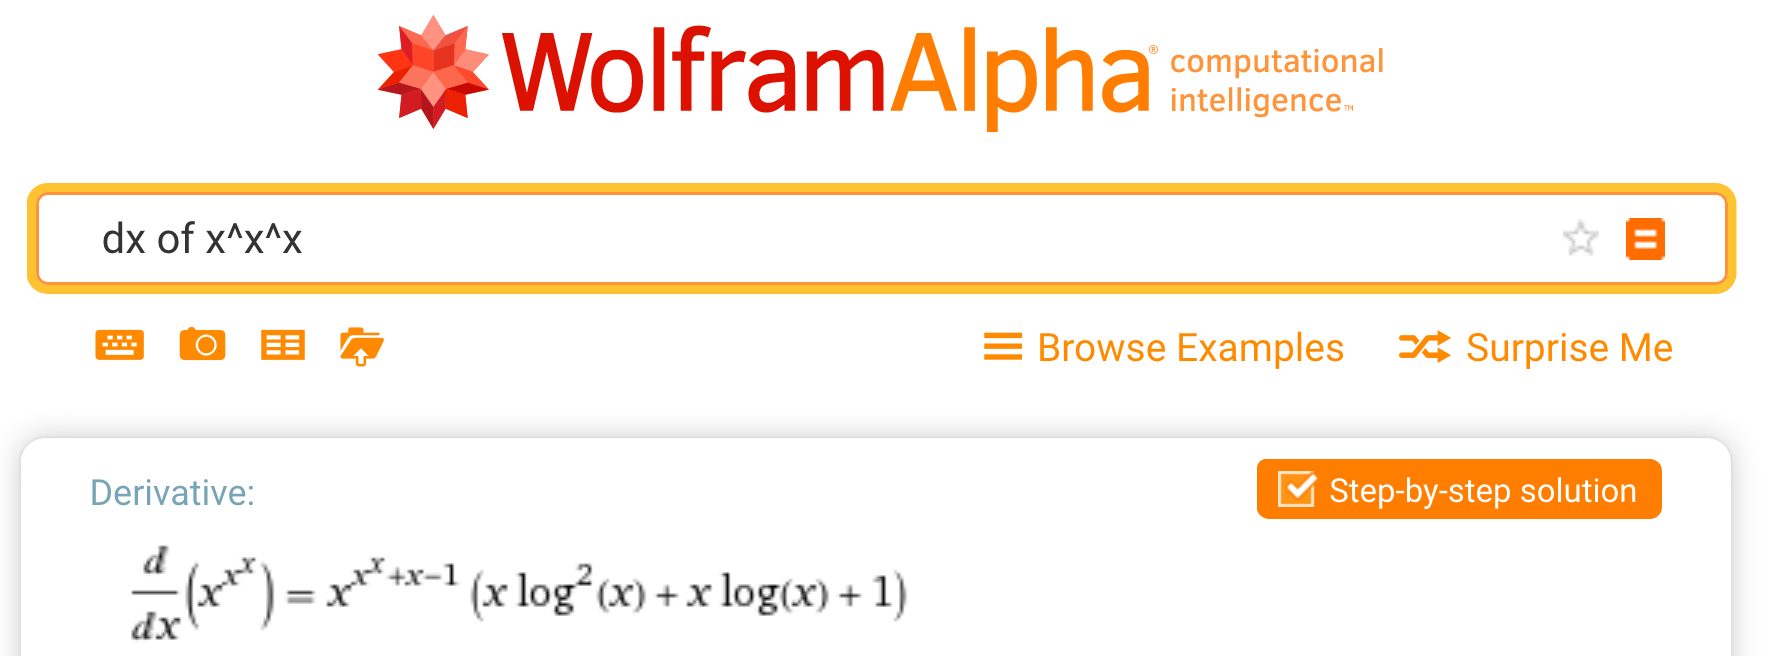

In [15]:
from IPython.display import Image, display
display(Image(filename='figs/Wolfram.png', width=700, embed=True))

Calculate the symbolic form of the derivative with ```symbolic_diff(dv='x')``` : 

$$\dfrac{d}{dx}\Big( x^{x^{x}} \Big) = x^{x^x + x - 1} (x log^2(x) + x log(x) + 1) $$

In [16]:
from AD.symdif import SD as SD
f1 = "POW(x, POW(x, x))"
vd = "x:2.0"
F1 = SD(f1)
F1.set_point(vd)
F1.symbolic_diff(dv='x') 

x**(x**x - 1)*(x**x + x**(x + 1)*(log(x) + 1)*log(x))

This is exactly the same solution as WolframAlpha after combining some terms:


$$x^{x^x -1} (x^x + x^{x + 1}(\log(x) + 1)\log(x))=x^{x^x  -1} (x^x (1 + x^{+ 1}(\log(x) + 1)\log(x)) $$

$$ x^{x^x + x -1} (1 + x(\log(x)\log(x) + \log(x)) ) =x^{x^x + x -1} (1 + x \log^2(x) + x \log(x)) )  $$

---

## Symbolic Differentiation
The derivative

$$\dfrac{d}{dx}\Big( x^{x^{x}} \Big) = x^{x^x + x - 1} (x log^2(x) + x log(x) + 1) $$

Evaluating this derivative at $x=2$ with ```diff(dv='x')```:

$$\dfrac{d}{dx}\Big( x^{x^{x}} \Big) = x^{x^x + x - 1} (x log^2(x) + x log(x) + 1) $$

$$\dfrac{d}{dx}\Big( x^{x^{x}} \Big) = 2^{2^2 + 2 - 1} (2 log^2(2) + 2 log(2) + 1)$$

$$\dfrac{d}{dx}\Big( x^{x^{x}} \Big) = 2^{5} (2 log^2(2) + 2 log(2) + 1)$$

In [17]:
F1.diff(dv='x') 

107.11041244660139

Check:

In [18]:
2**5*(2*math.log(2)**2 + 2*math.log(2) + 1)

107.11041244660139

---

 ## Symbolic Differentiation: multiple variables
 **Derivation regarding multiple variables**: ```diff_all()```

$$f(x)=x \cdot y \cdot z$$

$$\dfrac{d}{dx}\big( xyz \big) =yz=2\cdot3=6$$

$$\dfrac{d}{dy}\big( xyz \big)=xz=1\cdot3=3$$

$$\dfrac{d}{dz}\big( xyz \big)=xy=1\cdot2=2$$

In [19]:
f2 = "x*y*z"
vd = "x:1, y:2, z:3"
F2 = SD(f2)
F2.set_point(vd)
F2.diff_all()

{'d_x': 6.0, 'd_y': 3.0, 'd_z': 2.0}

---

## Symbolic Differentiation: Higher order
**Higher order derivation**: ```symbolic_diff("x", order = n_order)```

$$f(x) = \sin(x) + e^{-2x}$$

$$\dfrac{d}{dx}(e^{2x})= \cos(x) - 2 e^{-2 x} $$

$$\dfrac{d^2}{dx^2}(e^{2x})= - \sin(x) + 4 e^{-2 x} $$

$$\dfrac{d^3}{dx^3}(e^{2x})= - \cos(x)  - 8 e^{-2 x} $$

In [20]:
f1 = "sin(x) + EXP(-2*x)"
vd = "x:2"
F1 = SD(f1)
F1.set_point(vd)
F1.symbolic_diff("x") 

cos(x) - 2.0*exp(-2.0*x)

In [21]:
F1.symbolic_diff("x", order=2)

-sin(x) + 4.0*exp(-2.0*x)

In [22]:
F1.symbolic_diff("x", order=3) 

-cos(x) - 8.0*exp(-2.0*x)

---

## 3. Symbolic differentiation

### Pros

 - Return the formula as a string, easy computation of
 
  - High order derivatives
 
 - Derivatives with respect to many variables
 - Derivatives at different coordinates with ```set_point()```

 
### Cons
 
 - Slow
 - High memory usage

---

## Sympy package integration: Python library for symbolic mathematics

``` 
f1 = "(((((POW(x,3.0)*(3.0/x))*(3.0/x))+(POW(x,3.0)*((-3.0)/(x*x))))*y)*y)"

df1/dx = "((((((((POW(x,3.0)*(3.0/x))*(3.0/x))+(POW(x,3.0)*((-3.0)/(x*x))))*(3.0/x))+((POW(x,3.0)*(3.0/x))*((-3.0)/(x*x))))+(((POW(x,3.0)*(3.0/x))*(-3.0/(x*x)))+(POW(x,3.0)*(((-0*(x*x))-(-3.0*(x+x)))/((x*x)*(x*x))))))*y)*y)"
```
#### In ```symdif.SD.simplify()```  we use ```Sympy``` for simplification (not for symbolic differentiation!)

```python
f1 = "(((((POW(x,3.0)*(3.0/x))*(3.0/x))+(POW(x,3.0)*((-3.0)/(x*x))))*y)*y)"
f1 = "((((POW(x,1.0)*9.0)+(POW(x,3.0)*((-3.0)/(x*x))))*y)*y)"
f1 = "((((POW(x,1.0)*9.0)+(POW(x,1.0)*(-3.0)))*y)*y)"
f1 = "(((x*9.0)+x*-3.0))*y)*y)"
f1 = "((x*6.0)*y**2))"
f1 = "6*x*y**2"
```
$$\dfrac{d}{dx} \Big( f_1(x,y) \Big) = \dfrac{d}{dx} \Big( 6xy^2 \Big) = 6y^2$$

In [23]:
f1 = "(((((POW(x,3.0)*(3.0/x))*(3.0/x))+(POW(x,3.0)*((-3.0)/(x*x))))*y)*y)"
F1 = SD(f1)
vd = "x:1, y:2"
F1.set_point(vd)
F1.symbolic_diff("x", output='all');


Symbolic differentiation result:
((((((((POW(x,3.0)*(3.0/x))*(3.0/x))+(POW(x,3.0)*((-3.0)/(x*x))))*(3.0/x))+((POW(x,3.0)*(3.0/x))*((-3.0)/(x*x))))+(((POW(x,3.0)*(3.0/x))*(-3.0/(x*x)))+(POW(x,3.0)*(((-0*(x*x))-(-3.0*(x+x)))/((x*x)*(x*x))))))*y)*y)

Simplified Pretty Print:

     2
6.0⋅y 

Simplified Latex code:
6.0 y^{2}

Simplified Default:
6.0*y**2 



---

## Sympy package integration: Python library for symbolic mathematics. 
### Production of latex usable code

In [24]:
f1 = "TAN(x)"
vd = "x:2"
F1 = SD(f1)
F1.set_point(vd)
print(F1.symbolic_diff("x", output='latex') ) 

\frac{1}{\cos^{2}{\left (x \right )}}


When we latex this result: ``` \frac{1}{\cos^{2}{\left (x \right )}} ``` we get:

$$\frac{1}{\cos^{2}{\left (x \right )}}
$$

---

## Conclusion

#### AD Package Features
  
 1. Forward mode automatic differentiation
 2. Reverse mode automatic differentiation
 3. Symbolic differentiation 

In [25]:
print( 'Questions?')

Questions?


---

## Setting the stage for a Jupyter Notebook Slideshow! <a name="slides"></a>

Best display by installing the excellent **RISE package** the [Jupyter/IPython Slideshow Extension of damianavila](https://github.com/damianavila/RISE). Install by ```   >>> conda install -c conda-forge rise```
 
Afterwards a new button will after, after reopening a jupyter notebook:

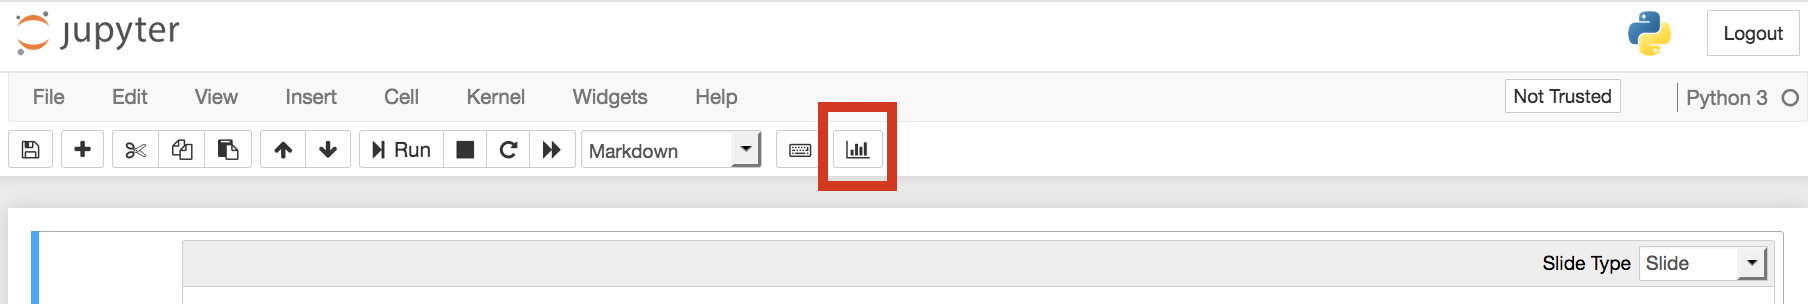

In [26]:
from IPython.display import Image, display
display(Image(filename='figs/IPythonSlideshow.png', width=700, embed=True))

**Custum layout CSS**

In [ ]:
import requests
from IPython.core.display import HTML
HTML(requests.get("https://raw.githubusercontent.com/cs207-f18-WIRS/cs207-FinalProject/master/demo/figs/Robbert_Struyven_css_config.css").text )

**Removing prompt numbers** ```In [1]:``` and ```Out [1]:``` ( If you want them back replace '''none''' with '''True''')

In [ ]:
%%HTML 
<style> div.prompt {display:none} </style>

**Adjust width:** 

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

**Navigate to next slide with arrows ->**